load data
plot data

In [1]:
import numpy as np
import pickle
import pandas as pd
import time
from umap import UMAP

In [2]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [3]:
from tfumap.paths import FIGURE_DIR, save_fig

In [4]:
save_loc = DATA_DIR / 'projection_speeds' 

In [5]:
datasets = [
    'cassins_dtw',
    'cifar10',
    'fmnist',
    'macosko2015',
    'mnist'
]

In [21]:
projection_speeds = pd.concat([pd.read_pickle(save_loc / (dataset + '.pickle')) for dataset in datasets])
projection_speeds[:3]

,method_,dimensions,dataset,speed,nex
0,network,2,cassins_dtw,1.998637,1000
1,network,2,cassins_dtw,0.007758,1000
2,network,2,cassins_dtw,0.008960,1000


In [40]:
projection_speeds['per_sample'] = projection_speeds.speed.astype('float') / projection_speeds.nex.astype('float') *1000

In [41]:
projection_speeds[:3]

,method_,dimensions,dataset,speed,nex,per_sample
0,network,2,cassins_dtw,1.998637,1000,1.998637
1,network,2,cassins_dtw,0.007758,1000,0.007758
2,network,2,cassins_dtw,0.008960,1000,0.008960


In [42]:
median_df = projection_speeds[['method_','dimensions','dataset','per_sample']].groupby(['method_','dimensions', 'dataset']).median()
median_df = median_df.T.melt()
median_df[:3]

,method_,dimensions,dataset,value
0,TSNE,2,cassins_dtw,0.999941
1,TSNE,2,cifar10,1.181048
2,TSNE,2,fmnist,0.583954


In [43]:
import seaborn as sns

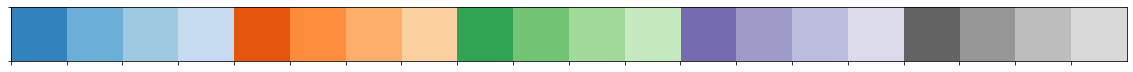

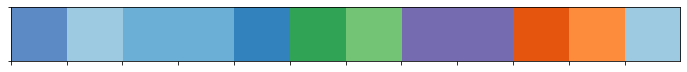

In [44]:
pal20c = sns.color_palette('tab20c', 20)
sns.palplot(pal20c)
hue_dict = {
    "umap-learn": list(np.array(pal20c[3])**4),
    "direct": pal20c[2],
    "AE": pal20c[1],
    "autoencoder": pal20c[1],
    "network": pal20c[0],
    'vae':  pal20c[8], 
    'ae_only':  pal20c[9],
    "pca":  pal20c[12],
    "PCA":  pal20c[12],
    "TSNE": pal20c[4], 
    "parametric-tsne":pal20c[5],
    "network-cpu": pal20c[2],

}
sns.palplot([hue_dict[i] for i in hue_dict.keys()])

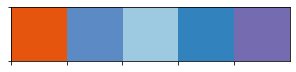

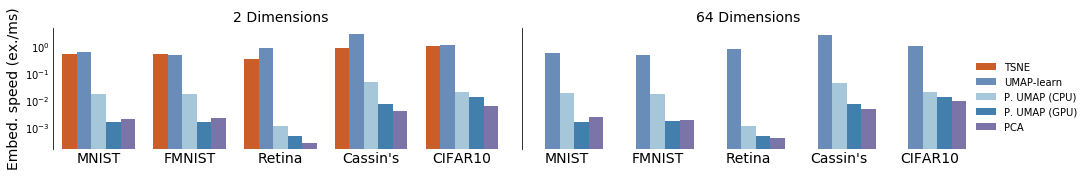

In [48]:
import matplotlib as mpl
axes = {'labelsize': 14,
        'titlesize': 14,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 14

hue_list = ["TSNE","umap-learn", "network-cpu", "network",  "pca"]
hue_pal = [hue_dict[i] for i in hue_list]
sns.palplot(hue_pal)
fg = sns.catplot(
    x="dataset",
    y="value",
    hue="method_",
    hue_order=hue_list,
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dimensions",
    height=2.75, 
    aspect=2.5,
    data=median_df,
    kind="bar",
    palette=hue_pal,
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Embed. speed (ex./ms)")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network-cpu'))[0][0]].set_text('P. UMAP (CPU)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP (GPU)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'pca'))[0][0]].set_text('PCA')
#fg._legend.texts[3].set_text("PCA")
#ax.set_ylim([1e-10,1e-3])
ax.set_yscale('log')
#fg._legend.texts[2].set_text("Param. UMAP")

ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')
#ax.set_yscale('log')

save_fig(FIGURE_DIR/'embedding_speed', save_pdf=True, dpi=300, pad_inches=0.1)

In [12]:
# 2 AMD EPYC Rome 7252 8-Core 3.1 GHz  processors 